<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

### Contents:
- [Background](#Background)
- [Loading of Libraries](#Loading-of-Libraries) 
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Data Dictionary](#Data-Dictionary)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The tourism industry contributes to about 4% of Singapore's annual GDP and there are many factors influencing the demand for travelling including the places of interests, food, culture and accessibility. One key factor is climate.

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since it is situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into rainfall, in particular, the amount of rainfall and the frequency of rain.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:
- Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;
- Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;
- Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

All the dataset used in the project comes from [data.gov.sg](https://data.gov.sg), as recorded at the Changi climate station, and from [singstat.gov.sg](https://www.singstat.gov.sg/), as recorded by the Singapore Tourism Board.

### Datasets

There are 3 datasets included in the [`data`](./data/) folder for this project. These correponds to rainfall and tourist arrivals information. 

* [`rainfall-monthly-number-of-rain-days.csv`](../data/rainfall-monthly-number-of-rain-days.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv`](../data/rainfall-monthly-total.csv): Monthly total rain recorded in mm(millimeters) from 1982 to 2022
* [`arrivals.csv`](../data/arrivals.csv): Monthly total international visitor arrivals from 1978 to 2022

## Problem Statement

We are a team of data scientists working for a hotel chain. We are tasked to optimise the operations and increase revenue for the company. Since climate is a key factor in influencing the demand for travelling, this project aims to analyse trends in Singapore weather and international arrivals to identify travelling periods for arrivals from the different regions around the world so as to provide targetted recommendations.

As Covid-19 hits the world at the end of 2019 and most travelling came to a halt in 2020, this project makes use of data from 2015 to 2019. A 5-year period is chosen to find the recent trends in travelling. The years from 2020 to 2022 are excluded as the data might become skewed due to Covid-19 restrictions around the world and the pent-up demand for travelling after easing policies were put in place by governments.

## Loading of Libraries

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning
- Load dataset
- Check for missing values and datatype
- Rename columns when necessary
- Drop unnecessary rows
- Merge datasets

### First Dataset: Rainy Days
#### Load Data

In [2]:
rain_days = pd.read_csv('../data/rainfall-monthly-number-of-rain-days.csv')
print(rain_days.shape)
rain_days.head()

(488, 2)


,month,no_of_rainy_days
0,1982-01,10
1,1982-02,5
2,1982-03,11
3,1982-04,14
4,1982-05,10


Column names are already in snake case so there is no need to rename.

#### Check for Missing Values and Datatype

In [3]:
rain_days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             488 non-null    object
 1   no_of_rainy_days  488 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.8+ KB


There are no missing values.

In [4]:
# month is currently not identified in the right format
# to_datetime function enables conversion to datetime type
rain_days['month'] = pd.to_datetime(rain_days['month']) 
rain_days.head()

,month,no_of_rainy_days
0,1982-01-01,10
1,1982-02-01,5
2,1982-03-01,11
3,1982-04-01,14
4,1982-05-01,10


In [5]:
rain_days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   month             488 non-null    datetime64[ns]
 1   no_of_rainy_days  488 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 7.8 KB


Datatype has been corrected.

#### Drop Unnecessary Rows 

In [6]:
# only data from the last five years pre-covid will be used for this project, 
# i.e., from 2015 to 2019
rain_days.drop(range(0, 396), inplace=True)

In [7]:
rain_days.drop(range(456, 488), inplace=True)

In [8]:
rain_days.reset_index(drop=True, inplace=True)

In [9]:
print(rain_days.shape)
rain_days.head()

(60, 2)


,month,no_of_rainy_days
0,2015-01-01,6
1,2015-02-01,6
2,2015-03-01,5
3,2015-04-01,13
4,2015-05-01,12


### Second Dataset: Rainfall
#### Load Data

In [10]:
rainfall = pd.read_csv('../data/rainfall-monthly-total.csv')
print(rainfall.shape)
rainfall.head()

(488, 2)


,month,total_rainfall
0,1982-01,107.1
1,1982-02,27.8
2,1982-03,160.8
3,1982-04,157.0
4,1982-05,102.2


Column names are already in snake case so there is no need to rename

#### Check for Missing Values and Datatype

In [11]:
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           488 non-null    object 
 1   total_rainfall  488 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


There are no missing values.

In [12]:
# month is currently not identified in the right format
# to_datetime function enables conversion to datetime type
rainfall['month'] = pd.to_datetime(rainfall['month']) 
rainfall.head()

,month,total_rainfall
0,1982-01-01,107.1
1,1982-02-01,27.8
2,1982-03-01,160.8
3,1982-04-01,157.0
4,1982-05-01,102.2


In [13]:
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   month           488 non-null    datetime64[ns]
 1   total_rainfall  488 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.8 KB


Datatype has been corrected.

#### Drop Unnecessary Rows

In [14]:
# only data from the last five years pre-covid will be used for this project, 
# i.e., from 2015 to 2019
rainfall.drop(range(0, 396), inplace=True)

In [15]:
rainfall.drop(range(456, 488), inplace=True)

In [16]:
rainfall.reset_index(drop=True, inplace=True)

In [17]:
print(rainfall.shape)
rainfall.head()

(60, 2)


,month,total_rainfall
0,2015-01-01,79.6
1,2015-02-01,18.8
2,2015-03-01,84.4
3,2015-04-01,73.2
4,2015-05-01,89.0


#### Merge Dataframes

In [18]:
# merge rain_days to rainfall
rainfall = rainfall.merge(rain_days, how='left', on='month')
print(rainfall.shape)
rainfall.head()

(60, 3)


,month,total_rainfall,no_of_rainy_days
0,2015-01-01,79.6,6
1,2015-02-01,18.8,6
2,2015-03-01,84.4,5
3,2015-04-01,73.2,13
4,2015-05-01,89.0,12


### Third Dataset: Arrivals
#### Load Data

In [19]:
arrivals = pd.read_csv(
    '../data/arrivals.csv',
    header = 9,
    usecols=range(0, 95))
print(arrivals.shape)
arrivals.head()

(83, 95)


,Data Series,2022 Oct,2022 Sep,2022 Aug,2022 Jul,2022 Jun,2022 May,2022 Apr,2022 Mar,2022 Feb,...,2015 Oct,2015 Sep,2015 Aug,2015 Jul,2015 Jun,2015 May,2015 Apr,2015 Mar,2015 Feb,2015 Jan
0,Total International Visitor Arrivals By Inboun...,816758.0,782076.0,728744.0,726624.0,543733.0,418458.0,295095.0,121207.0,67764.0,...,1246947.0,1131976.0,1445062.0,1519233.0,1184747.0,1222836.0,1208624.0,1201648.0,1188818.0,1252608.0
1,Southeast Asia,374913.0,340345.0,315820.0,332128.0,269088.0,204656.0,137294.0,41170.0,18759.0,...,465052.0,414155.0,444137.0,579570.0,496392.0,512074.0,478213.0,461999.0,380389.0,448133.0
2,Brunei Darussalam,3733.0,3809.0,3426.0,3238.0,2202.0,2271.0,807.0,280.0,163.0,...,4825.0,5761.0,4585.0,7237.0,4992.0,5378.0,4977.0,6989.0,4759.0,5521.0
3,Indonesia,133408.0,120165.0,108252.0,119086.0,110094.0,86745.0,58330.0,13622.0,6872.0,...,204574.0,187629.0,205671.0,305600.0,238403.0,238688.0,207138.0,211347.0,184183.0,236295.0
4,Malaysia,77088.0,81914.0,63905.0,61572.0,49878.0,43214.0,25319.0,10610.0,4467.0,...,88338.0,93334.0,88834.0,102347.0,100074.0,100340.0,90515.0,101929.0,82408.0,86193.0


In [20]:
# Transpose data
arrivals = arrivals.set_index('Data Series').transpose()

In [21]:
arrivals.reset_index(inplace=True)

In [22]:
# Looking at the columns to facilitate selection in next step
arrivals.columns

Index([                                                                                                                                                                                                 'index',
                                                                                                                                              'Total International Visitor Arrivals By Inbound Tourism Markets',
                                                                                                                                                                                             '  Southeast Asia',
                                                                                                                                                                                        '    Brunei Darussalam',
                                                                                                                                                                    

In [23]:
# Filter data to only include regions instead of specific countries
arrivals = arrivals[['index', 'Total International Visitor Arrivals By Inbound Tourism Markets', '  Southeast Asia', '  Greater China', '  North Asia', '  South Asia', '  West Asia', '  Americas', '  Europe', '  Oceania', '  Africa']]
arrivals.head()

Data Series,index,Total International Visitor Arrivals By Inbound Tourism Markets,Southeast Asia,Greater China,North Asia,South Asia,West Asia,Americas,Europe,Oceania,Africa
0,2022 Oct,816758.0,374913.0,42408.0,45802.0,101487.0,9382.0,49917.0,103886.0,85111.0,3738.0
1,2022 Sep,782076.0,340345.0,36662.0,45881.0,104589.0,9807.0,46337.0,100632.0,94014.0,3712.0
2,2022 Aug,728744.0,315820.0,33996.0,50394.0,94325.0,11241.0,44100.0,110258.0,65622.0,2903.0
3,2022 Jul,726624.0,332128.0,35485.0,40868.0,94977.0,12301.0,47360.0,83296.0,77562.0,2582.0
4,2022 Jun,543733.0,269088.0,23566.0,25153.0,76667.0,5839.0,36723.0,48879.0,55574.0,2184.0


#### Check for Missing Values and Datatype

In [24]:
arrivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 11 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   index                                                            94 non-null     object 
 1   Total International Visitor Arrivals By Inbound Tourism Markets  94 non-null     float64
 2     Southeast Asia                                                 94 non-null     float64
 3     Greater China                                                  94 non-null     float64
 4     North Asia                                                     94 non-null     float64
 5     South Asia                                                     94 non-null     float64
 6     West Asia                                                      94 non-null     float64
 7     Americas                                    

There are no missing values

In [25]:
# month is currently not identified in the right format
# to_datetime function enables conversion to datetime type
arrivals['index'] = pd.to_datetime(arrivals['index']) 
arrivals.head()

Data Series,index,Total International Visitor Arrivals By Inbound Tourism Markets,Southeast Asia,Greater China,North Asia,South Asia,West Asia,Americas,Europe,Oceania,Africa
0,2022-10-01,816758.0,374913.0,42408.0,45802.0,101487.0,9382.0,49917.0,103886.0,85111.0,3738.0
1,2022-09-01,782076.0,340345.0,36662.0,45881.0,104589.0,9807.0,46337.0,100632.0,94014.0,3712.0
2,2022-08-01,728744.0,315820.0,33996.0,50394.0,94325.0,11241.0,44100.0,110258.0,65622.0,2903.0
3,2022-07-01,726624.0,332128.0,35485.0,40868.0,94977.0,12301.0,47360.0,83296.0,77562.0,2582.0
4,2022-06-01,543733.0,269088.0,23566.0,25153.0,76667.0,5839.0,36723.0,48879.0,55574.0,2184.0


In [26]:
arrivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 11 columns):
 #   Column                                                           Non-Null Count  Dtype         
---  ------                                                           --------------  -----         
 0   index                                                            94 non-null     datetime64[ns]
 1   Total International Visitor Arrivals By Inbound Tourism Markets  94 non-null     float64       
 2     Southeast Asia                                                 94 non-null     float64       
 3     Greater China                                                  94 non-null     float64       
 4     North Asia                                                     94 non-null     float64       
 5     South Asia                                                     94 non-null     float64       
 6     West Asia                                                      94 non-null     flo

Datatype has been corrected

#### Rename Columns

In [27]:
arrivals.columns = ['month', 'total_arrival', 'southeast_asia', 'greater_china', 'north_asia', 'south_asia', 'west_asia', 'americas', 'europe', 'oceania', 'africa']
arrivals.head(2)

,month,total_arrival,southeast_asia,greater_china,north_asia,south_asia,west_asia,americas,europe,oceania,africa
0,2022-10-01,816758.0,374913.0,42408.0,45802.0,101487.0,9382.0,49917.0,103886.0,85111.0,3738.0
1,2022-09-01,782076.0,340345.0,36662.0,45881.0,104589.0,9807.0,46337.0,100632.0,94014.0,3712.0


#### Drop Unnecessary Rows

In [28]:
# only data from the last five years pre-covid will be used for this project, 
# i.e., from 2015 to 2019
arrivals.drop(range(0, 34), inplace=True)

In [29]:
arrivals.reset_index(drop=True, inplace=True)

In [30]:
print(arrivals.shape)
arrivals.head()

(60, 11)


,month,total_arrival,southeast_asia,greater_china,north_asia,south_asia,west_asia,americas,europe,oceania,africa
0,2019-12-01,1724961.0,662907.0,342199.0,118932.0,146360.0,14757.0,100218.0,189183.0,134070.0,16335.0
1,2019-11-01,1533668.0,565680.0,319671.0,125534.0,139058.0,12438.0,82972.0,179959.0,100883.0,7472.0
2,2019-10-01,1530479.0,555996.0,331072.0,136707.0,142972.0,12276.0,68654.0,164050.0,112052.0,6697.0
3,2019-09-01,1463543.0,511664.0,318888.0,132515.0,129203.0,11778.0,64342.0,159864.0,127327.0,7961.0
4,2019-08-01,1736102.0,520958.0,499809.0,173762.0,135500.0,22847.0,71328.0,203813.0,99796.0,8289.0


#### Merge Dataframes

In [31]:
# merge arrivals to rainfall
rainfall_arrivals = pd.merge(rainfall, arrivals, how='left', on='month')
print(rainfall_arrivals.shape)
rainfall_arrivals.head()

(60, 13)


,month,total_rainfall,no_of_rainy_days,total_arrival,southeast_asia,greater_china,north_asia,south_asia,west_asia,americas,europe,oceania,africa
0,2015-01-01,79.6,6,1252608.0,448133.0,207586.0,130360.0,94529.0,13037.0,64780.0,158529.0,129274.0,6377.0
1,2015-02-01,18.8,6,1188818.0,380389.0,327971.0,113888.0,76576.0,9073.0,57924.0,147155.0,72276.0,3562.0
2,2015-03-01,84.4,5,1201648.0,461999.0,198908.0,122861.0,91552.0,16316.0,64764.0,160349.0,79761.0,5138.0
3,2015-04-01,73.2,13,1208624.0,478213.0,243881.0,88349.0,108179.0,12262.0,49143.0,128157.0,94029.0,6410.0
4,2015-05-01,89.0,12,1222836.0,512074.0,214376.0,96909.0,151623.0,10058.0,48014.0,99889.0,85227.0,4663.0


#### Save and Export

In [32]:
# Save cleaned and merged dataframes as csv files
import os
if not os.path.exists('output'):
    os.makedirs('output')
rainfall.to_csv('output/rainfall_arrivals.csv', index=False)

## Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---| 
|total_rainfall|float|rainfall-monthly-total|Total rainfall in mm in each month| 
|no_of_rainy_days|integer|rainfall-monthly-number-of-rain-days|Number of rainy days in each month|
|total_arrival|float|arrivals|Total international visitor arrivals in each month|
|southeast_asia|float|arrivals|Total international visitor arrivals from Southeast Asia (including Brunei Darussalam, Indonesia, Malaysia, Myanmar, Philippines, Thailand and Vietnam) in each month|
|greater_china|float|arrivals|Total international visitor arrivals from Greater China (including China, Hong Kong SAR and Taiwan) in each month|
|north_asia|float|arrivals|Total international visitor arrivals from North Asia (including Japan and South Korea) in each month|
|south_asia|float|arrivals|Total international visitor arrivals from South Asia (including Bangladesh, India, Pakistan and Sri Lanka) in each month|
|west_asia|float|arrivals|Total international visitor arrivals from West Asia (including Iran, Israel, Kuwait, Saudi Arabia and United Arab Emirates) in each month|
|americas|float|arrivals|Total international visitor arrivals from Americas (including Canada and USA) in each month|
|europe|float|arrivals|Total international visitor arrivals from Europe (including Belgium, Luxembourg, Denmark, Finland, France, Germany, Italy, Netherlands, Norway, Republic of Ireland, Russian Federation, Spain, Sweden, Switzerland and United Kingdom) in each month|
|oceania|float|arrivals|Total international visitor arrivals from Oceania (including Australia and New Zealand) in each month|
|africa|float|arrivals|Total international visitor arrivals from Africa (including Egypt, Mauritius and Republic of South Africa) in each month|

## Exploratory Data Analysis
- Summary statistics
- Investigate trends in data
  - Investigation on climate
    - What is the month-on-month trend in total rainfall across the years?
      - Which month have the highest and lowest total rainfall?
      - Which year have the highest and lowest total rainfall?
    - What is the month-on-month trend in the number of rainy days across the years?
      - Which month have the highest and lowest number of rainy days?
      - Which year have the highest and lowest number of rainy days?
  - Investigation on international visitor arrivals
    - What is the month-on-month trend in total international visitor arrivals?
      - Which month have the highest and lowest total international visitor arrivals?
      - Which year have the highest and lowest total international visitor arrivals?
- Presence of outliers
  - Are there any outliers months in the dataset?

### Summary Statistics

In [33]:
rainfall_arrivals.describe()

,total_rainfall,no_of_rainy_days,total_arrival,southeast_asia,greater_china,north_asia,south_asia,west_asia,americas,europe,oceania,africa
count,60.000000,60.000000,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,139.068333,13.600000,1.444731e+06,518767.300000,332958.150000,118872.850000,127923.866667,14226.000000,65350.183333,157149.050000,102960.700000,6519.883333
std,88.254700,5.585089,1.607513e+05,65050.643626,77117.235016,18632.812093,28126.088309,4272.772013,13012.418790,33191.493019,17820.950148,2178.452974
min,6.200000,4.000000,1.131976e+06,380389.000000,198908.000000,88349.000000,76576.000000,8629.000000,42354.000000,86155.000000,68362.000000,3562.000000
25%,78.000000,9.750000,1.351932e+06,470185.500000,289019.000000,102646.500000,107958.250000,11097.500000,55282.500000,138971.500000,89870.750000,5266.750000
50%,129.400000,13.000000,1.469065e+06,510408.500000,328025.500000,118496.000000,126635.000000,12644.500000,64401.500000,159928.500000,102443.000000,6155.500000
75%,181.400000,18.000000,1.553706e+06,556167.250000,375752.000000,130407.750000,143286.750000,15701.750000,73769.750000,179354.250000,115779.000000,7111.000000
max,421.500000,27.000000,1.802593e+06,662907.000000,499809.000000,173762.000000,218406.000000,24247.000000,100218.000000,224478.000000,137660.000000,16335.000000


### Investigate Trends in Data: Climate

#### What is the month-on-month trend in total rainfall across the years?

Text(0, 0.5, 'Total Rainfall (in millimetres)')

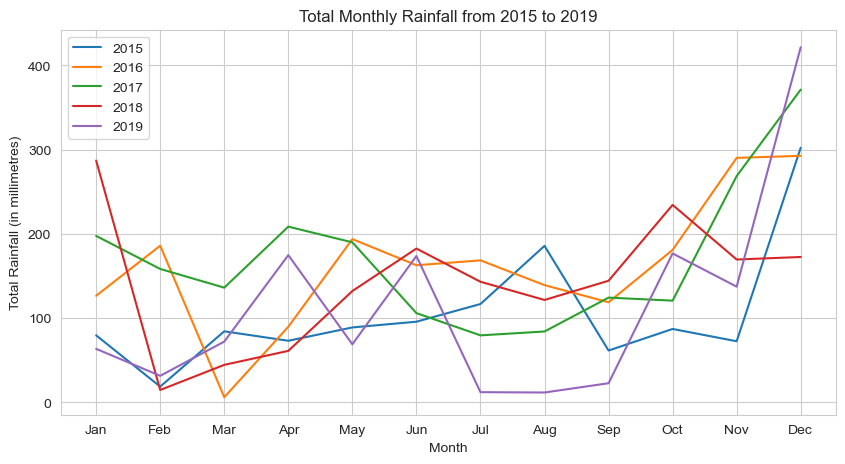

In [34]:
fig = plt.figure(figsize =(10, 5))
sns.set_style('whitegrid')
x_axis = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

rainfall_2015_y = list((rainfall_arrivals.loc[rainfall_arrivals['month'].dt.year == 2015, 'total_rainfall']))
rainfall_2016_y = list((rainfall_arrivals.loc[rainfall_arrivals['month'].dt.year == 2016, 'total_rainfall']))
rainfall_2017_y = list((rainfall_arrivals.loc[rainfall_arrivals['month'].dt.year == 2017, 'total_rainfall']))
rainfall_2018_y = list((rainfall_arrivals.loc[rainfall_arrivals['month'].dt.year == 2018, 'total_rainfall']))
rainfall_2019_y = list((rainfall_arrivals.loc[rainfall_arrivals['month'].dt.year == 2019, 'total_rainfall']))
y_axis = [rainfall_2015_y, rainfall_2016_y, rainfall_2017_y, rainfall_2018_y, rainfall_2019_y]

plt.plot(x_axis, rainfall_2015_y, label = "2015")
plt.plot(x_axis, rainfall_2016_y, label = "2016")
plt.plot(x_axis, rainfall_2017_y, label = "2017")
plt.plot(x_axis, rainfall_2018_y, label = "2018")
plt.plot(x_axis, rainfall_2019_y, label = "2019")
plt.legend()
plt.title('Total Monthly Rainfall from 2015 to 2019')
plt.xlabel('Month')
plt.ylabel('Total Rainfall (in millimetres)')

There is no significant change in the range of total rainfall across the years.

#### Which month have the highest and lowest total rainfall?

In [35]:
# Find the trend in rainfall using mean rainfall since there is no significant change across the years
rainfall_mean = []
for i in list(range(1,13)):
    rainfall_mean.append(rainfall_arrivals[rainfall_arrivals['month'].dt.month==i].total_rainfall.mean())

Text(0, 0.5, 'Total Rainfall (in millimetres)')

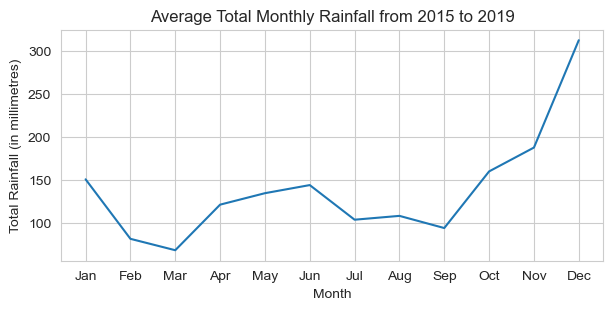

In [36]:
fig = plt.figure(figsize =(7, 3))
sns.set_style('whitegrid')
x_axis = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.plot(x_axis, rainfall_mean)
plt.title('Average Total Monthly Rainfall from 2015 to 2019')
plt.xlabel('Month')
plt.ylabel('Total Rainfall (in millimetres)')

On average, the highest monthly rainfall occurs in December while the lowest monthly rainfall occurs in March.

#### Which year have the highest and lowest total rainfall?

Text(0, 0.5, 'Total Rainfall (in millimetres)')

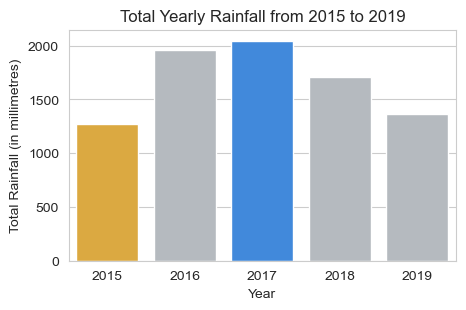

In [37]:
fig = plt.figure(figsize =(5, 3))
sns.set_style('whitegrid')
yearly_rainfall = rainfall_arrivals.groupby(rainfall_arrivals['month'].dt.year)['total_rainfall'].sum()
x = ['2015', '2016', '2017', '2018', '2019']
y = [yearly_rainfall[2015], yearly_rainfall[2016], yearly_rainfall[2017], yearly_rainfall[2018], yearly_rainfall[2019]] 

sns.barplot(data = yearly_rainfall, x=x, y=y, palette = [(245/255, 178/255, 39/255, 0.65), (179/255, 186/255, 193/255, 0.8), (39/255, 136/255, 245/255, 0.8), (179/255, 186/255, 193/255, 0.8), (179/255, 186/255, 193/255, 0.8)])
plt.title('Total Yearly Rainfall from 2015 to 2019')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (in millimetres)')

The highest total rainfall is in 2017 while the lowest total rainfall is in 2015.

#### What is the month-on-month trend in the number of rainy days across the years?

Text(0, 0.5, 'Number of Rainy Days')

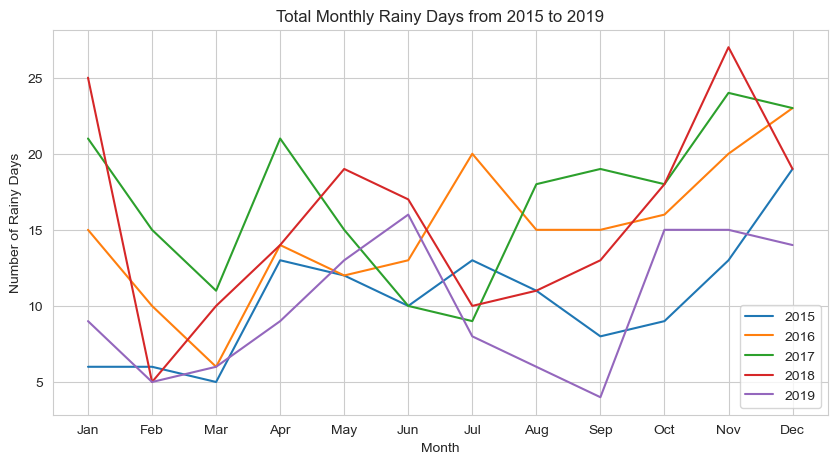

In [38]:
fig = plt.figure(figsize =(10, 5))
sns.set_style('whitegrid')
x_axis = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

raindays_2015_y = list((rainfall_arrivals.loc[rainfall_arrivals['month'].dt.year == 2015, 'no_of_rainy_days']))
raindays_2016_y = list((rainfall_arrivals.loc[rainfall_arrivals['month'].dt.year == 2016, 'no_of_rainy_days']))
raindays_2017_y = list((rainfall_arrivals.loc[rainfall_arrivals['month'].dt.year == 2017, 'no_of_rainy_days']))
raindays_2018_y = list((rainfall_arrivals.loc[rainfall_arrivals['month'].dt.year == 2018, 'no_of_rainy_days']))
raindays_2019_y = list((rainfall_arrivals.loc[rainfall_arrivals['month'].dt.year == 2019, 'no_of_rainy_days']))
y_axis = [raindays_2015_y, raindays_2016_y, raindays_2017_y, raindays_2018_y, raindays_2019_y]

plt.plot(x_axis, raindays_2015_y, label = "2015")
plt.plot(x_axis, raindays_2016_y, label = "2016")
plt.plot(x_axis, raindays_2017_y, label = "2017")
plt.plot(x_axis, raindays_2018_y, label = "2018")
plt.plot(x_axis, raindays_2019_y, label = "2019")
plt.legend()
plt.title('Total Monthly Rainy Days from 2015 to 2019')
plt.xlabel('Month')
plt.ylabel('Number of Rainy Days')

There is no significant change in the range of the number of rainy days across the years.

#### Which month have the highest and lowest number of rainy days?

In [39]:
# Find the trend in raindays using mean raindays since there is no significant change across the years
raindays_mean = []
for i in list(range(1,13)):
    raindays_mean.append(rainfall_arrivals[rainfall_arrivals['month'].dt.month==i].no_of_rainy_days.mean())

Text(0, 0.5, 'Number of Rainy Days')

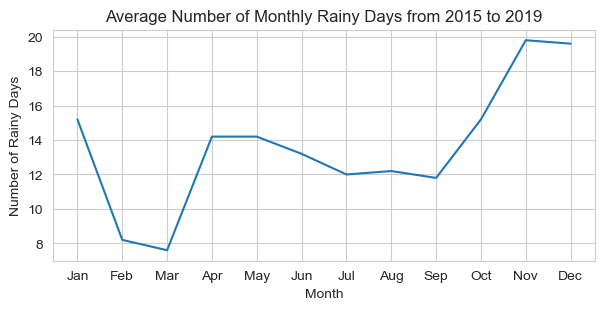

In [40]:
fig = plt.figure(figsize =(7, 3))
sns.set_style('whitegrid')
x_axis = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.plot(x_axis, raindays_mean)
plt.title('Average Number of Monthly Rainy Days from 2015 to 2019')
plt.xlabel('Month')
plt.ylabel('Number of Rainy Days')

From the result above, we can conclude that the month with the highest number of rainy days is around November and December, while the month with the lowest number of rainy days is around February and March.

#### Which year have the highest and lowest number of rainy days in the date range of analysis?

Text(0, 0.5, 'Number of Rainy Days')

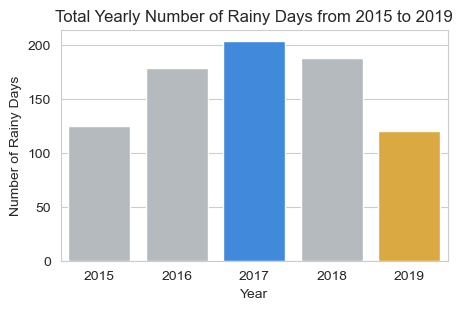

In [41]:
fig = plt.figure(figsize =(5, 3))
sns.set_style('whitegrid')
yearly_raindays = rainfall_arrivals.groupby(rainfall_arrivals['month'].dt.year)['no_of_rainy_days'].sum()
x = ['2015', '2016', '2017', '2018', '2019']
y = [yearly_raindays[2015], yearly_raindays[2016], yearly_raindays[2017], yearly_raindays[2018], yearly_raindays[2019]] 

sns.barplot(data = yearly_raindays, x=x, y=y, palette = [(179/255, 186/255, 193/255, 0.8), (179/255, 186/255, 193/255, 0.8), (39/255, 136/255, 245/255, 0.8), (179/255, 186/255, 193/255, 0.8), (245/255, 178/255, 39/255, 0.65)])
plt.title('Total Yearly Number of Rainy Days from 2015 to 2019')
plt.xlabel('Year')
plt.ylabel('Number of Rainy Days')

The highest number of rainy days is in 2017 while the lowest number of rainy days is in 2019.

### Investigate Trends in Data: International Visitor Arrivals

#### What is the month-on-month trend in total international visitor arrivals?

Text(0, 0.5, 'Total Number of Arrivals (in millions)')

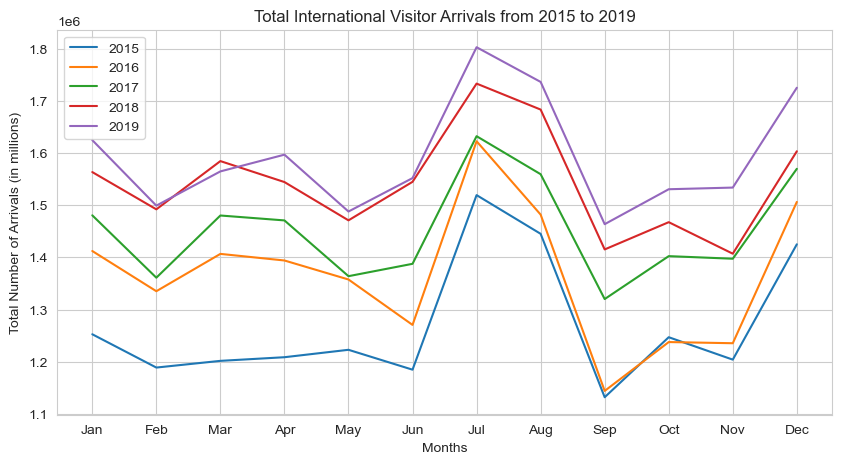

In [42]:
fig = plt.figure(figsize =(10, 5))
sns.set_style('whitegrid')
x_axis = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

arrivals_2015_y = list((rainfall_arrivals.loc[rainfall_arrivals['month'].dt.year == 2015, ['month', 'total_arrival']])['total_arrival'])
arrivals_2016_y = list((rainfall_arrivals.loc[rainfall_arrivals['month'].dt.year == 2016, ['month', 'total_arrival']])['total_arrival'])
arrivals_2017_y = list((rainfall_arrivals.loc[rainfall_arrivals['month'].dt.year == 2017, ['month', 'total_arrival']])['total_arrival'])
arrivals_2018_y = list((rainfall_arrivals.loc[rainfall_arrivals['month'].dt.year == 2018, ['month', 'total_arrival']])['total_arrival'])
arrivals_2019_y = list((rainfall_arrivals.loc[rainfall_arrivals['month'].dt.year == 2019, ['month', 'total_arrival']])['total_arrival'])
y_axis = [arrivals_2015_y, arrivals_2016_y, arrivals_2017_y, arrivals_2018_y, arrivals_2019_y]

plt.plot(x_axis, arrivals_2015_y, label = "2015")
plt.plot(x_axis, arrivals_2016_y, label = "2016")
plt.plot(x_axis, arrivals_2017_y, label = "2017")
plt.plot(x_axis, arrivals_2018_y, label = "2018")
plt.plot(x_axis, arrivals_2019_y, label = "2019")
plt.legend()
plt.title('Total International Visitor Arrivals from 2015 to 2019')
plt.xlabel('Months')
plt.ylabel('Total Number of Arrivals (in millions)')

The shape of the line graphs show a similar trend in total international visitor arrivals. The lull periods are usually around February, May to June, and September to November. The peak periods are usually around July to August, and December.

From the graphs, there is also an upward trend in the volume of arrivals.

#### Which month have the highest and lowest total international visitor arrivals?

In [43]:
arrival_mean = []
for i in list(range(1,13)):
    arrival_mean.append(rainfall_arrivals[rainfall_arrivals['month'].dt.month==i].total_arrival.mean())

Text(0, 0.5, 'Number of Visitor Arrivals (in millions)')

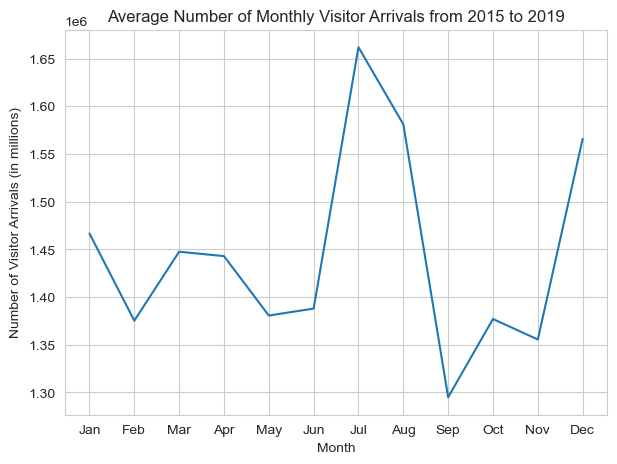

In [44]:
fig = plt.figure(figsize =(7, 5))
sns.set_style('whitegrid')
x_axis = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.plot(x_axis, arrival_mean)
plt.title('Average Number of Monthly Visitor Arrivals from 2015 to 2019')
plt.xlabel('Month')
plt.ylabel('Number of Visitor Arrivals (in millions)')

From the graph above, we can conclude that the month with the highest average number of visitor arrivals is around July, while the month with the lowest average number of visitor arrivals is around September.

#### Which year have the highest and lowest total international visitor arrivals?

Text(0, 0.5, 'Number of Visitor Arrivals (in ten millions)')

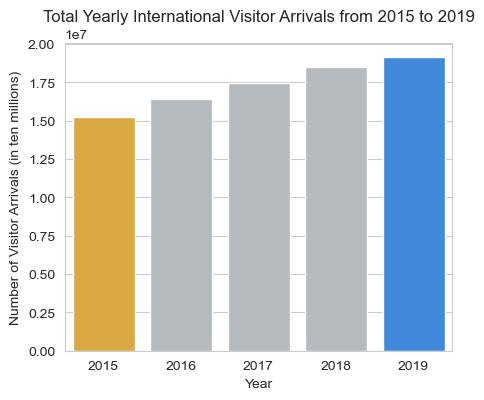

In [45]:
fig = plt.figure(figsize =(5, 4))
sns.set_style('whitegrid')
yearly_arrivals = rainfall_arrivals.groupby(rainfall_arrivals['month'].dt.year)['total_arrival'].sum()
x = ['2015', '2016', '2017', '2018', '2019']
y = [yearly_arrivals[2015], yearly_arrivals[2016], yearly_arrivals[2017], yearly_arrivals[2018], yearly_arrivals[2019]] 

sns.barplot(data = yearly_arrivals, x=x, y=y, palette = [(245/255, 178/255, 39/255, 0.65), (179/255, 186/255, 193/255, 0.8), (179/255, 186/255, 193/255, 0.8), (179/255, 186/255, 193/255, 0.8), (39/255, 136/255, 245/255, 0.8)])
plt.title('Total Yearly International Visitor Arrivals from 2015 to 2019')
plt.xlabel('Year')
plt.ylabel('Number of Visitor Arrivals (in ten millions)')

There is also an upward trend in the volume of arrivals.

The highest total international visitor arrivals is in 2019 while the lowest total international visitor arrivals is in 2015.

#### Are there any outliers months in the dataset?

<function matplotlib.pyplot.show(close=None, block=None)>

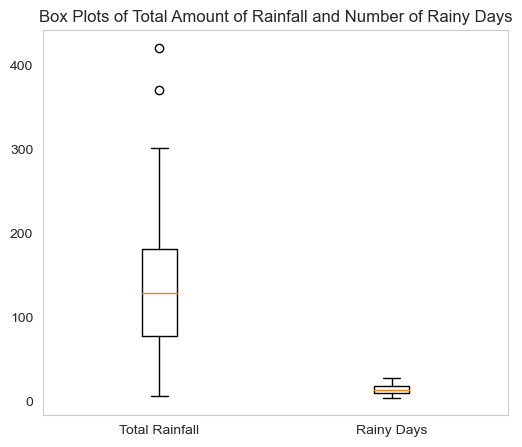

In [46]:
fig = plt.figure(figsize =(6, 5))
data1 = rainfall_arrivals.total_rainfall
data2 = rainfall_arrivals.no_of_rainy_days
data = [data1, data2]

plt.boxplot(data)
plt.grid(False)
plt.title('Box Plots of Total Amount of Rainfall and Number of Rainy Days')
plt.xticks([1, 2], ['Total Rainfall', 'Rainy Days'])
plt.show

There are two outliers in the data on the total amount of monthly rainfall which could be due to the monsoon periods. There are no outliers in the data on the number of rainy days.

<function matplotlib.pyplot.show(close=None, block=None)>

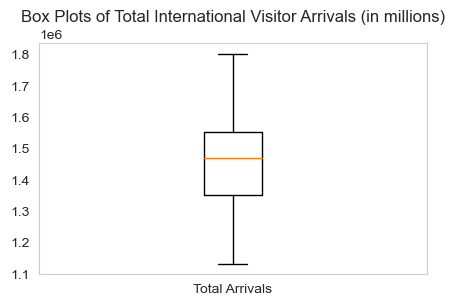

In [47]:
fig = plt.figure(figsize =(5, 3))
data3 = rainfall_arrivals.total_arrival
plt.title('Box Plots of Total International Visitor Arrivals (in millions)')
plt.boxplot(data3)
plt.grid(False)
plt.xticks([1], ['Total Arrivals'])
plt.show

There is no outlier in the data on total international arrival.

<function matplotlib.pyplot.show(close=None, block=None)>

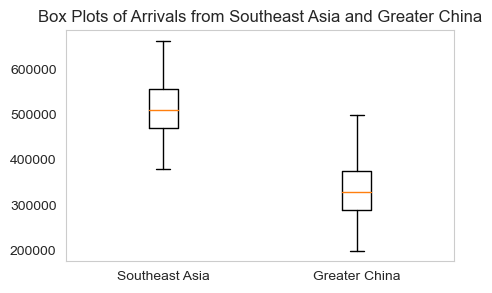

In [48]:
fig = plt.figure(figsize =(5, 3))
data4 = rainfall_arrivals.southeast_asia
data5 = rainfall_arrivals.greater_china
data = [data4, data5]

plt.title('Box Plots of Arrivals from Southeast Asia and Greater China')
plt.boxplot(data)
plt.grid(False)
plt.xticks([1, 2], ['Southeast Asia', 'Greater China'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

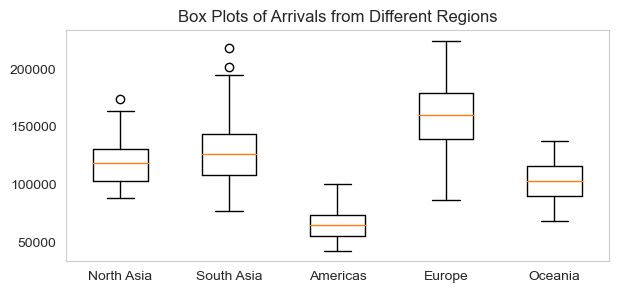

In [49]:
fig = plt.figure(figsize =(7, 3))
data6 = rainfall_arrivals.north_asia
data7 = rainfall_arrivals.south_asia
data9 = rainfall_arrivals.americas
data10 = rainfall_arrivals.europe
data11 = rainfall_arrivals.oceania
data = [data6, data7, data9, data10, data11]

plt.title('Box Plots of Arrivals from Different Regions')
plt.boxplot(data)
plt.grid(False)
plt.xticks([1, 2, 3, 4, 5], ['North Asia', 'South Asia', 'Americas', 'Europe', 'Oceania'])
plt.show

There is one outlier in the data on the arrivals from North Asia and two outliers in that of South Asia.

<function matplotlib.pyplot.show(close=None, block=None)>

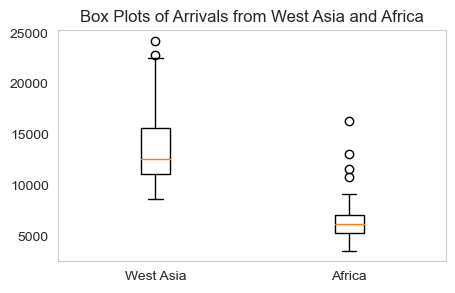

In [50]:
fig = plt.figure(figsize =(5, 3))
data8 = rainfall_arrivals.west_asia
data12 = rainfall_arrivals.africa
data = [data8, data12]

plt.title('Box Plots of Arrivals from West Asia and Africa')
plt.boxplot(data)
plt.grid(False)
plt.xticks([1, 2], ['West Asia', 'Africa'])
plt.show

There are two outliers in the data on the arrivals from West Asia and four outliers in that of Africa.

Overall, there is no substantial number of outliers from the data used, except from the arrival data from Africa which might have to be removed subsequently upon further investigation.

## Visualize the Data
- Find correlation
- Further investigations

### Heat Map to find Correlation

Text(0.5, 1.0, 'Heat Map to find Correlation between Rainfall and Arrivals')

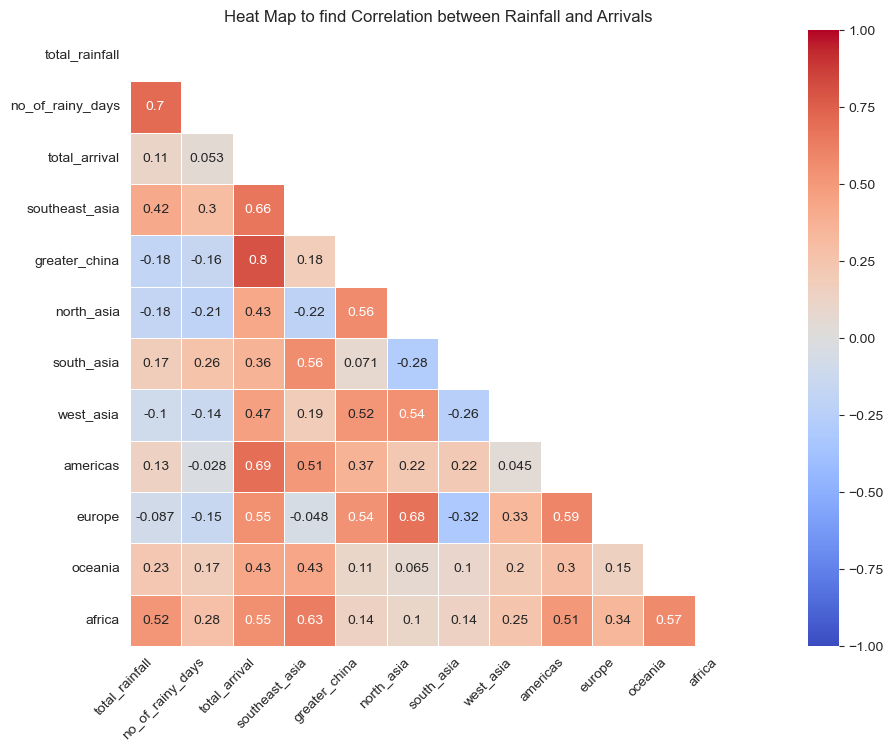

In [51]:
plt.figure(figsize = (16,8))

# Get correlation of variables. (statistical significance)
corr = rainfall_arrivals.corr(numeric_only = True)

# Set up mask to be "True" in the upper triangle.
# because it will be the mirror image of lower triangle we'll see on our plot.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5, cmap='coolwarm')

plt.xticks(rotation = 45, ha="right")
plt.title('Heat Map to find Correlation between Rainfall and Arrivals')

There seems to be some correlation between the amount of rainfall and the total international visitor arrivals from Africa followed by Southeast Asia. 

For most of the other regions, there is no obvious correlation based on the recorded data.

Interestingly, there is a high correlation between the total international visitor arrivals and those arriving from Greater China, followed by arrivals from Americas, Southeast Asia, Europe and Africa.

### Further Investigations

#### Scatter plot to investigate amount of rainfall versus international visitor arrivals from Africa

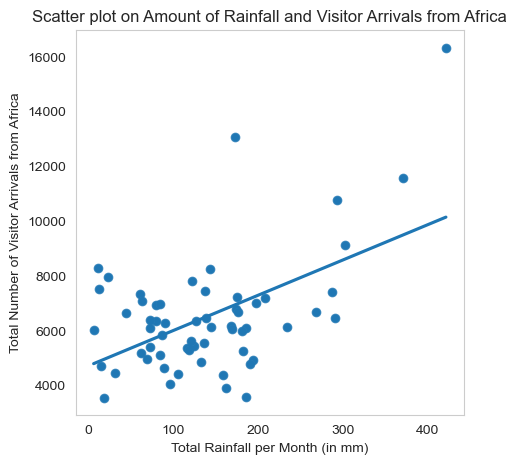

In [52]:
fig = plt.figure(figsize =(5, 5))
sns.scatterplot(data = rainfall_arrivals, x = 'total_rainfall', y = 'africa')
plt.grid(False)
sns.regplot(data = rainfall_arrivals, x = 'total_rainfall', y = 'africa', ci=None)
plt.title('Scatter plot on Amount of Rainfall and Visitor Arrivals from Africa')
plt.xlabel('Total Rainfall per Month (in mm)')
plt.ylabel('Total Number of Visitor Arrivals from Africa')
plt.show()

From the scatter plot, there is some correlation between the amount of rainfall and the visitor arrivals from Africa. As indicated in the box plot above as well, there are a few outliers which might be removed upon further investigation.

#### Scatter plot to investigate amount of rainfall versus international visitor arrivals from Southeast Asia

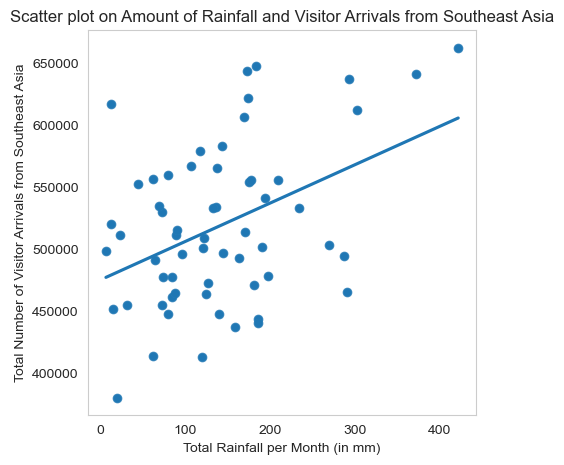

In [53]:
fig = plt.figure(figsize =(5, 5))
sns.scatterplot(data = rainfall_arrivals, x = 'total_rainfall', y = 'southeast_asia')
plt.grid(False)
sns.regplot(data = rainfall_arrivals, x = 'total_rainfall', y = 'southeast_asia', ci=None)
plt.title('Scatter plot on Amount of Rainfall and Visitor Arrivals from Southeast Asia')
plt.xlabel('Total Rainfall per Month (in mm)')
plt.ylabel('Total Number of Visitor Arrivals from Southeast Asia')
plt.show()

From the scatter plot, there is some correlation between the amount of rainfall and the visitor arrivals from Southeast Asia with a wider spread as compared to that of Africa.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

#### Key takeaways from the data:
- Rainfall
  - On average, the highest monthly rainfall occurs in December, which coincides with the Northest Monsoon season, while the lowest monthly rainfall occurs in March.
  - On average, we can conclude that the month with the highest number of rainy days is around November and December, which coincides with the Northest Monsoon season, while the month with the lowest number of rainy days is around February and March.
- International Visitor Arrivals
  - There is a similar trend in total international visitor arrivals across the years - the lull periods are usually September, while the peak periods are usually around July.
  - There is an upward trend in the volume of arrivals over the years which shows a strong demand for travel.
- Rainfall and International Visitor Arrivals
  - There seems to be some positive correlation between the amount of rainfall and the total international visitor arrivals from Africa followed by Southeast Asia.
  - There is some correlation between the amount of rainfall and the visitor arrivals from Africa. As indicated in the box plot above as well, there are a few outliers which might be removed upon further investigation.
  - There is some correlation between the amount of rainfall and the visitor arrivals from Southeast Asia with a wider spread as compared to that of Africa.
  - Since there is no obvious correlations between the amount of rainfall and the visitor arrivals from the other regions, this suggests that there are other factors driving the decisions for travelling besides weather conditions. Some factors might include the holiday periods of those regions, the reasons for travel and flight prices. Thus, more datasets on those possible factors have to be used to supplement this project.
- Total International Visitor Arrivals and Arrivals from Different Regions
  - There is a high correlation between the total international visitor arrivals and those arriving from Greater China, followed by arrivals from Americas, Southeast Asia, Europe and Africa.

#### Recommendations
- Since there is less visitor arrivals from Africa and Southeast Asia around March, less resources can be allocated to meet their needs to optimise operations. On the other hand, since there is more visitor arrivals from Africa and Southeast Asia around December, more resources can be allocated to cater to their needs to optimise revenue. For example, more programmes and food options suitable for visitors from Africa and Southeast Asia can be put in place around December.
- Similarly, since there is less visitor arrivals from Greater China, Americas and Europe around September, less resources can be allocated to meet their needs to optimise operations. On the other hand, since there is more visitor arrivals from these regions around July, more resources can be allocated to cater to their needs to optimise revenue.
- Overall, there is an increasing demand for travelling through the years before Covid-19 so hotels can be prepared for higher room demands when government restrictions ease. Hotels have to be prepared to employ more manpower to meet a higher demand.

---

## Extra: Hypothesis Testing

Hypothese testing will be done on the arrivals from Africa since it has the highest correlation with a rainfall feature.

Since the range of rainfall and number of rainy days does not change much based on the month-on-month analysis, the mean for each month across the different years will be taken for the hypothesis testing.

#### Looking at the average rainfall for each month across the date range of analysis

In [54]:
rainfall_mean = pd.DataFrame(rainfall_mean)
rainfall_mean

,0
0,150.88
1,81.92
2,68.72
3,121.52
4,134.80
5,144.20
6,104.08
7,108.52
8,94.42
9,160.04


#### Looking at the average number of rainy days for each month across the date range of analysis

In [55]:
raindays_mean = pd.DataFrame(raindays_mean)
raindays_mean

,0
0,15.2
1,8.2
2,7.6
3,14.2
4,14.2
5,13.2
6,12.0
7,12.2
8,11.8
9,15.2


#### Merge both columns

In [56]:
df_mean = pd.concat([rainfall_mean, raindays_mean], axis=1)
df_mean.columns = ['rainfall_mean', 'raindays_mean']
df_mean

,rainfall_mean,raindays_mean
0,150.88,15.2
1,81.92,8.2
2,68.72,7.6
3,121.52,14.2
4,134.80,14.2
5,144.20,13.2
6,104.08,12.0
7,108.52,12.2
8,94.42,11.8
9,160.04,15.2


#### Find the average visitor arrivals from Africa for each month across the date range of analysis

In [57]:
africa_mean = []
for i in list(range(1,13)):
    africa_mean.append(rainfall_arrivals[rainfall_arrivals['month'].dt.month==i].africa.mean())
africa_mean

[6859.4,
 4150.2,
 5900.6,
 6901.2,
 4840.6,
 4896.8,
 6860.0,
 7136.4,
 6014.4,
 6065.0,
 6432.0,
 12182.0]

#### Display statsmodels Results

In [58]:
import statsmodels.api as sm
X = df_mean # X is now a subset df with column, values from only these 3 cols
y = africa_mean # y is now a series with only values from this 1 col

X = sm.add_constant(X, prepend=True) # Add a column of ones to first col of X -> print X to see. This is done to let statsmodels know that we want the intercept of linear equation (more details soon)
results = sm.OLS(y, X).fit()

In [59]:
# see const column inserted as first col as a result of sm.add_constant() above
X.head()

,const,rainfall_mean,raindays_mean
0,1.0,150.88,15.2
1,1.0,81.92,8.2
2,1.0,68.72,7.6
3,1.0,121.52,14.2
4,1.0,134.80,14.2


In [60]:
results.summary()

/Users/jo/mambaforge/envs/dsi-sg/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     8.858
Date:                Sat, 10 Dec 2022   Prob (F-statistic):            0.00748
Time:                        12:47:57   Log-Likelihood:                -101.29
No. Observations:                  12   AIC:                             208.6
Df Residuals:                       9   BIC:                             210.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4380.1560   1658.372      2.641      0.027     628.657    8131.655
rainfall_mean    34.8117     12.070      2.884      0.018       7.506      62.117
raindays_mean  -198.6380    208.091     -0.955      0.365    -669.373     272.097
==============================================================================
Omnibus:                        3.105   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                1.248
Skew:                          -0.363   Prob(JB):                        0.536
Kurtosis:                       1.597   Cond. No.                         682.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the p-value for the average rainfall is less than 0.05, it is likely to predict the arrivals from Africa.